In [50]:
## ignore warnings
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore')

In [51]:
## reading the data 
data = pd.read_csv("AAPL.csv")

In [52]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [53]:
## lite exploration 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [54]:
data['Date'] = pd.to_datetime(data['Date'], format="%d-%m-%Y")

In [55]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [56]:
data= data.set_index('Date')


In [57]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2011 entries, 2012-01-03 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2011 non-null   float64
 1   High       2011 non-null   float64
 2   Low        2011 non-null   float64
 3   Close      2011 non-null   float64
 4   Adj Close  2011 non-null   float64
 5   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.0 KB


In [59]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2011.0,1.267075e+02,5.048375e+01,5.542429e+01,8.588286e+01,1.130500e+02,1.651900e+02,2.911200e+02
High,2011.0,1.278276e+02,5.092630e+01,5.708571e+01,8.671786e+01,1.141900e+02,1.674100e+02,2.939700e+02
Low,2011.0,1.255803e+02,5.012494e+01,5.501429e+01,8.505643e+01,1.118700e+02,1.634250e+02,2.881200e+02
Close,2011.0,1.267412e+02,5.057837e+01,5.579000e+01,8.620214e+01,1.130500e+02,1.652450e+02,2.915200e+02
Adj Close,2011.0,1.195055e+02,5.243844e+01,4.892193e+01,7.505668e+01,1.052229e+02,1.600471e+02,2.895226e+02
Volume,2011.0,5.949670e+07,4.683856e+07,1.136200e+07,2.758565e+07,4.346900e+07,7.471030e+07,3.765300e+08


In [60]:
# checking duplicated values 
data.duplicated().sum()

0

In [61]:
# Check for missing value
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [62]:
## checking the correlation 
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999782,0.999718,0.999496,0.998895,-0.557956
High,0.999782,1.000000,0.999657,0.999748,0.999171,-0.554909
Low,0.999718,0.999657,1.000000,0.999769,0.999179,-0.563426
Close,0.999496,0.999748,0.999769,1.000000,0.999402,-0.559654
Adj Close,0.998895,0.999171,0.999179,0.999402,1.000000,-0.566332
Volume,-0.557956,-0.554909,-0.563426,-0.559654,-0.566332,1.000000


In [63]:
import datetime


# Define the start and end dates
start_date=datetime.date(2012,1,2)
end_date=datetime.date(2019,12,30)

# Calculate the number of days between start and end date
delta = end_date - start_date
print("Total Days:",delta)

# Initialize counters for market close days and market open days
market_close_days= 0
market_open_days = 0


# Loop through each day in the date range
for i in range(delta.days + 1):
    current_date = start_date+datetime.timedelta(days=i)
    
    
# Check if the current day is a weekend (saturday or sunday)    
    if current_date.weekday()>=5:
         continue 
            
            
    market_open_days += 1
    
print("Market open days:",market_open_days)

Total Days: 2919 days, 0:00:00
Market open days: 2086


In [64]:
data.head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
2012-01-10,60.844284,60.857143,60.214287,60.462856,52.248333,64549100
2012-01-11,60.382858,60.407143,59.901428,60.364285,52.163139,53771200
2012-01-12,60.325714,60.414288,59.821430,60.198570,52.019955,53146800
2012-01-13,59.957142,60.064285,59.808571,59.972858,51.824898,56505400


We have total days 2919     #(2919-2086===833)......That means 833 days market is closed

market open days are 2086 days  # market open only 5 days in week

we have record of 2011 days   #(2086-2011=75)......that means we have 75 missing values

If we add market close days and missing values days we get total record of missing days # (833+75 = 908).......
We conclude that we have missing velues/records of 908 Days.

    

In [65]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300


In [66]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300


In [67]:
# Interpolate the missing values

data = data.interpolate(method='linear')

# Reset the index
data= data.reset_index()
# Print the DataFrame with missing values interpolated
print(data)

           Date        Open        High         Low       Close   Adj Close  \
0    2012-01-03   58.485714   58.928570   58.428570   58.747143   50.765709   
1    2012-01-04   58.571430   59.240002   58.468571   59.062859   51.038536   
2    2012-01-05   59.278572   59.792858   58.952858   59.718571   51.605175   
3    2012-01-06   59.967144   60.392857   59.888573   60.342857   52.144630   
4    2012-01-09   60.785713   61.107143   60.192856   60.247143   52.061932   
...         ...         ...         ...         ...         ...         ...   
2006 2019-12-23  280.529999  284.250000  280.369995  284.000000  282.054138   
2007 2019-12-24  284.690002  284.890015  282.920013  284.269989  282.322266   
2008 2019-12-26  284.820007  289.980011  284.700012  289.910004  287.923645   
2009 2019-12-27  291.119995  293.970001  288.119995  289.799988  287.814392   
2010 2019-12-30  289.459991  292.690002  285.220001  291.519989  289.522614   

        Volume  
0     75555200  
1     65005500  


In [68]:
data.shape

(2011, 7)

In [69]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


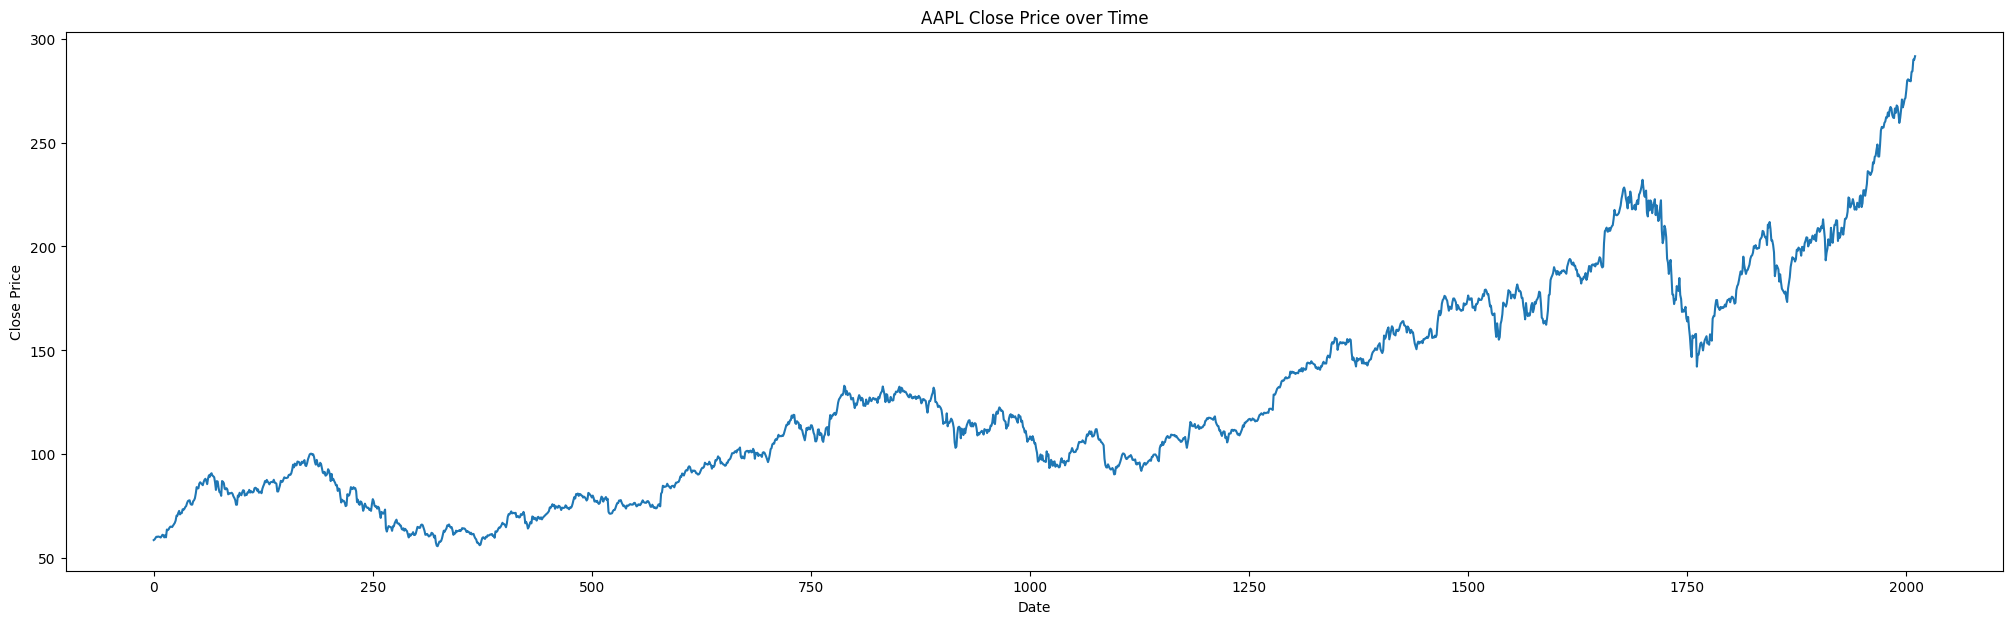

In [70]:
import matplotlib.pyplot as plt

# Plot the Close price over time
plt.figure(figsize=(25,7))
plt.plot(data['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('AAPL Close Price over Time')
plt.show()


In [71]:
data.index = pd.to_datetime(data.Date)


## Weekly Smoothening

In [72]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2012-01-03,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2019-12-23,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300


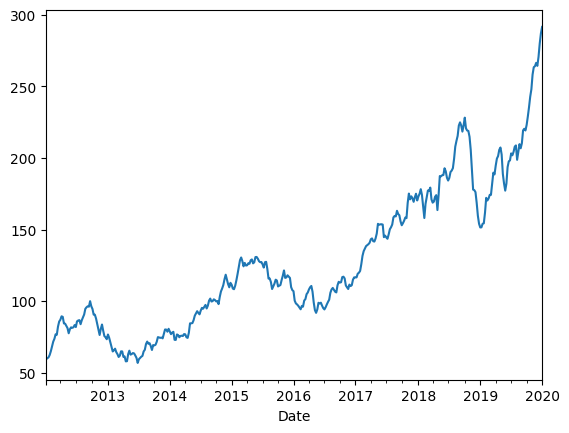

<Figure size 2500x700 with 0 Axes>

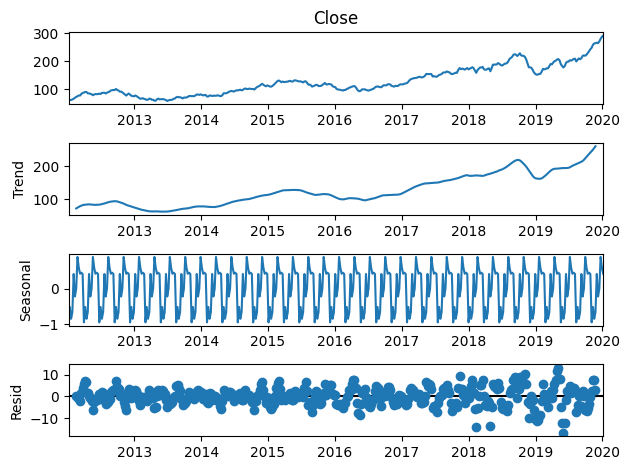

In [73]:

W_data=data.resample('W').mean()
W_data['Close'].plot()

from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(25,7))
decompose_ts_add = seasonal_decompose(W_data.Close,period=12) #period 12 is 
decompose_ts_add.plot()
plt.show()

### From the above decomposition plot , we are getting an exponential trend with additive seasonality

## Monthly Smoothening

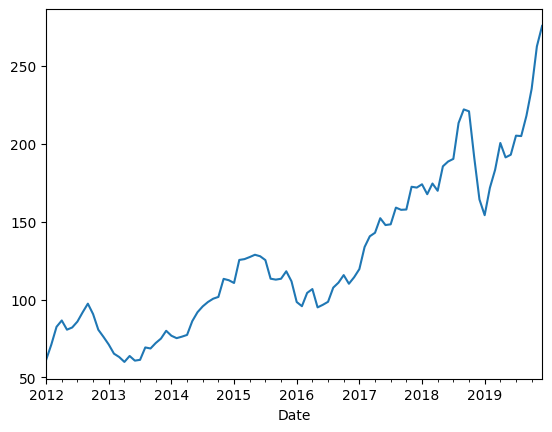

<Figure size 2500x700 with 0 Axes>

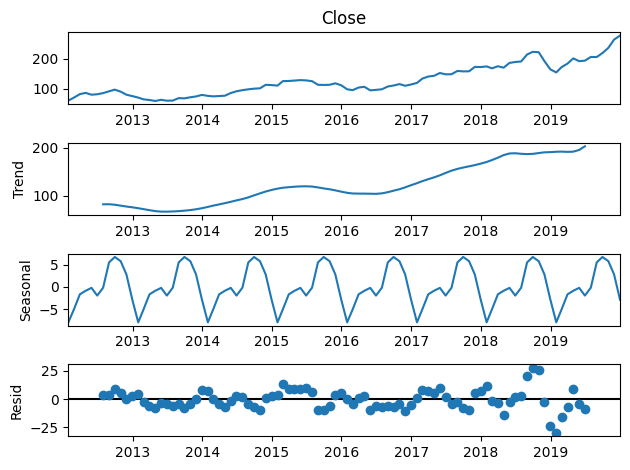

In [74]:
M_data=data.resample('M').mean()
M_data['Close'].plot()

plt.figure(figsize=(25,7))
decompose_ts_add = seasonal_decompose(M_data.Close,period=12) #period 12 is 
decompose_ts_add.plot()
plt.show()

### From the above decomposition plot , we are getting an exponential trend with additive seasonality


## Quaterly Smoothening

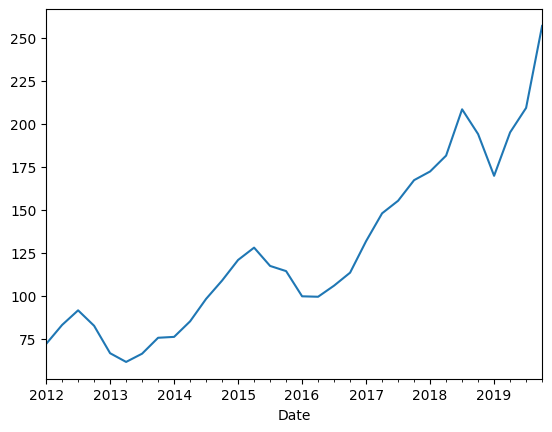

<Figure size 2500x700 with 0 Axes>

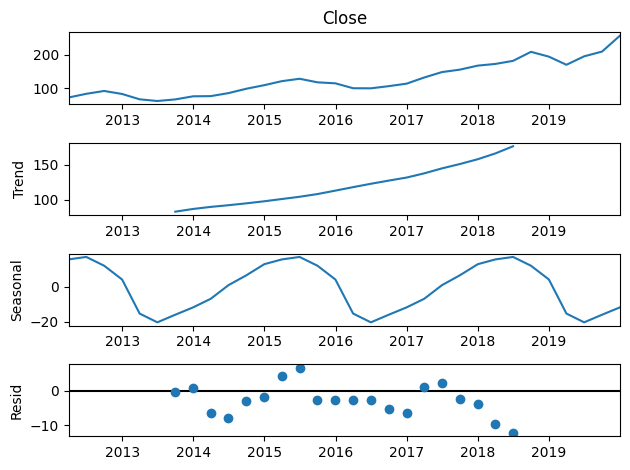

In [75]:
Q_data=data.resample('Q').mean()
Q_data['Close'].plot()

plt.figure(figsize=(25,7))
decompose_ts_add = seasonal_decompose(Q_data.Close,period=12) #period 12 is 
decompose_ts_add.plot()
plt.show()

### From the above decomposition plot , we are getting an exponential trend with additive seasonality


## Annual Smoothening

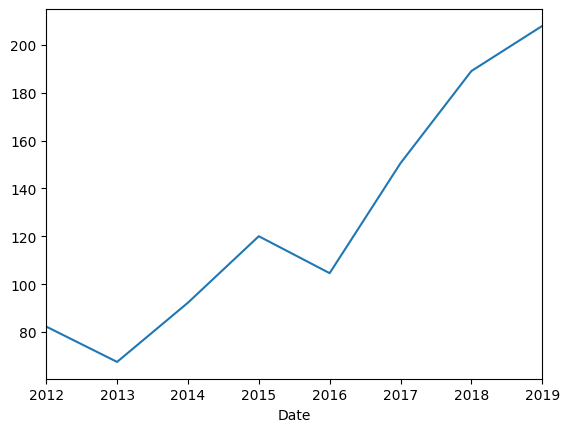

<Figure size 2500x700 with 0 Axes>

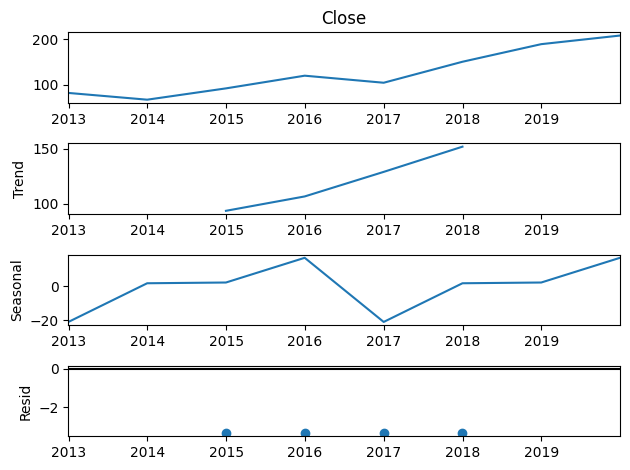

In [76]:
A_data=data.resample('A').mean()
A_data['Close'].plot()
plt.figure(figsize=(25,7))
decompose_ts_add = seasonal_decompose(A_data.Close,period=4) #period 12 is 
decompose_ts_add.plot()
plt.show()

### From the above decomposition plot , we are getting an exponential trend with additive seasonality


### From the above smoothening techniques, we can conclude that our data has an upward exponential trend with Additive Seasonality.
### The presence of seasonality indicates that our data is non-stationery. Forecasting cannot be done on a non stationery data.
### Hence we will have to perform some transformations.

## Statisitical Test for finding out the Stationarity: ADF Test

### Null Hypothesis(Ho)= The data is Non-stationary
### Alternate Hypothesis(Ha)= The data is stationary

In [77]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
Adf_test = adfuller(data['Close'],autolag='AIC')
Adf_output=pd.Series(Adf_test[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])

Observations of Dickey-fuller test


In [78]:
Adf_output

Test Statistic                    1.219370
p-value                           0.996117
#lags used                        9.000000
number of observations used    2001.000000
dtype: float64

### If p-value<0.05, we reject the null hypothesis
### If p-value>0.05, we fail to reject the null hypothesis

### Hence, as our p-value is greater than 0.05, we fail to reject the null hypothesis. We can conclude via ADF test, that our Data is Non-stationary

In [79]:
data=data.set_index('Date')

In [80]:
data.tail(365)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-19,189.690002,192.550003,189.690002,191.880005,186.437805,20286800
2018-07-20,191.779999,192.429993,190.169998,191.440002,186.010315,20676200
2018-07-23,190.679993,191.960007,189.559998,191.610001,186.175430,15989400
2018-07-24,192.449997,193.660004,192.050003,193.000000,187.526047,18697900
2018-07-25,193.059998,194.850006,192.429993,194.820007,189.294418,16709900
...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300


In [81]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300


In [82]:
# Determine train and test set boundaries
total_data_points = len(data)
test_set_boundary = data.index.max() - pd.DateOffset(years=1)  # Last year of data as test set boundary

# Split data into train and test sets
train_set = data.loc[data.index <= test_set_boundary]
test_set = data.loc[data.index > test_set_boundary]

# Optionally, reset the index if needed


# Check the shapes of train and test sets
print("Train set shape:", train_set.shape)
print("Test set shape:", test_set.shape)


Train set shape: (1759, 6)
Test set shape: (252, 6)


In [83]:
train_set

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2018-12-21,156.860001,158.160004,149.630005,150.729996,147.481339,95744600
2018-12-24,148.149994,151.550003,146.589996,146.830002,143.665421,37169200
2018-12-26,148.300003,157.229996,146.720001,157.169998,153.782547,58582500


In [84]:
train_set

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2018-12-21,156.860001,158.160004,149.630005,150.729996,147.481339,95744600
2018-12-24,148.149994,151.550003,146.589996,146.830002,143.665421,37169200
2018-12-26,148.300003,157.229996,146.720001,157.169998,153.782547,58582500


## Log transformation and Differencing for train and test dataset

<AxesSubplot: xlabel='Date'>

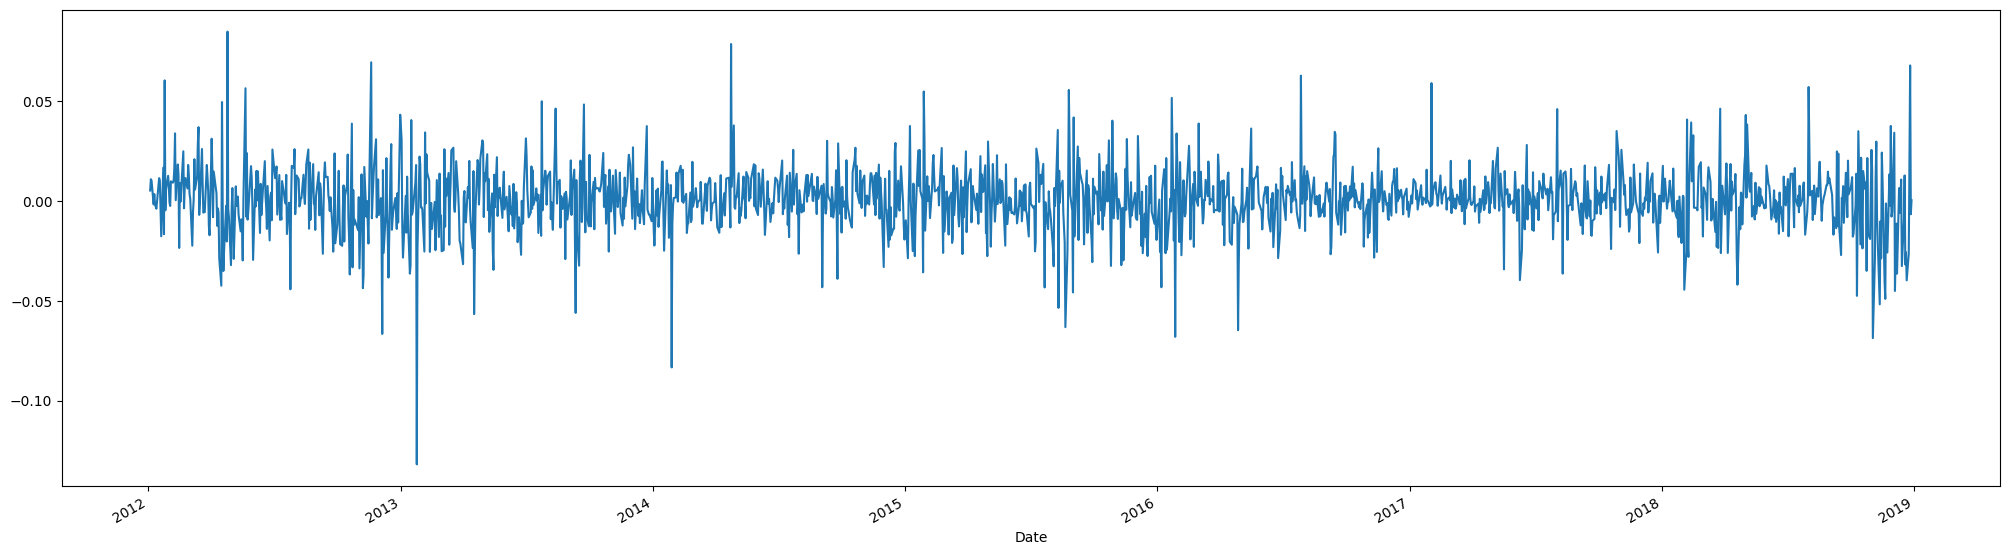

In [85]:
plt.figure(figsize=(25,7))
data_log_tr= np.log(train_set['Close'])
data_log_diff_tr=data_log_tr- data_log_tr.shift()
data_log_diff_tr.dropna().plot()

<AxesSubplot: xlabel='Date'>

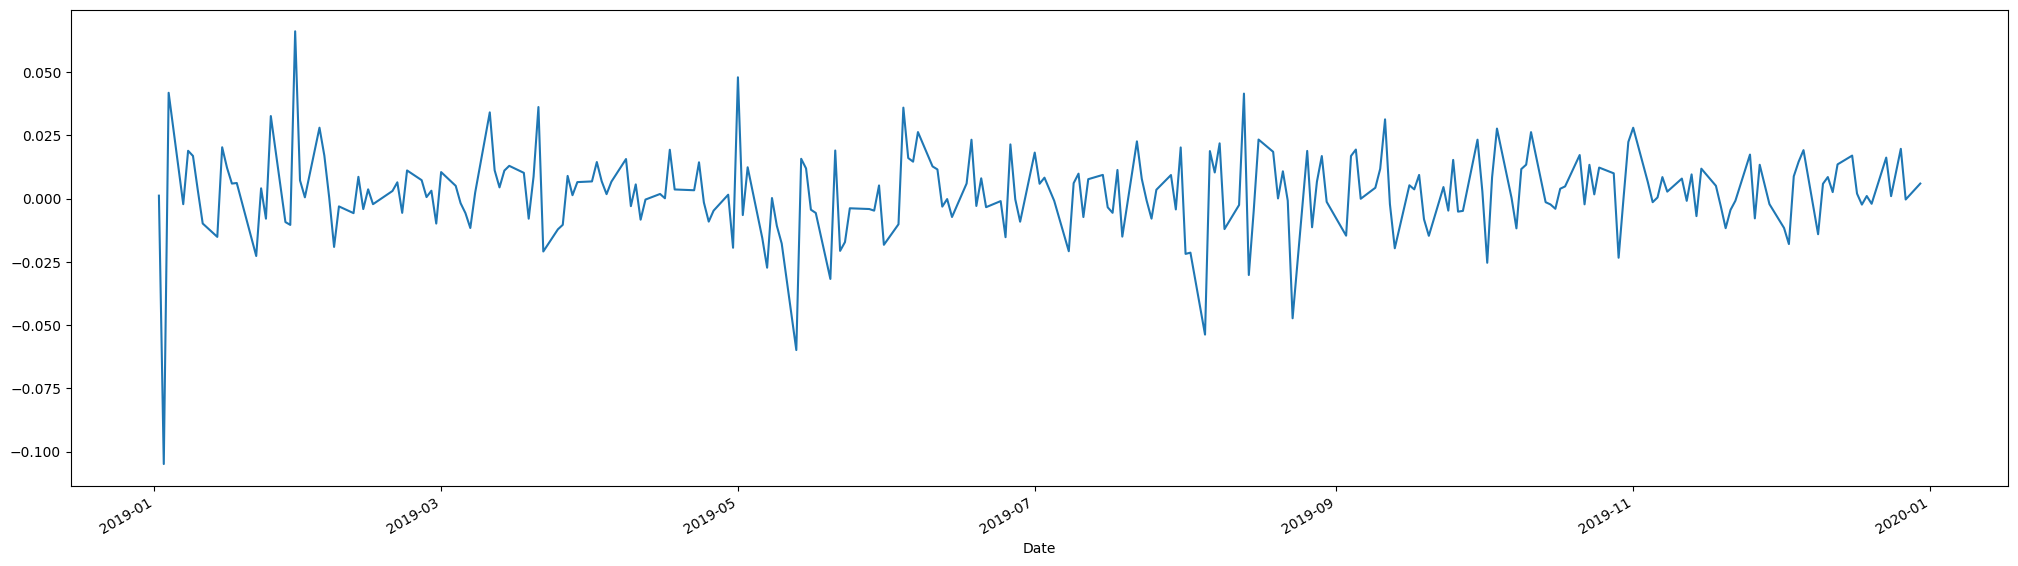

In [86]:
plt.figure(figsize=(25,7))
data_log_te= np.log(test_set['Close'])
data_log_diff_te=data_log_te- data_log_te.shift()
data_log_diff_te.dropna().plot()

In [87]:
data_transformed=data_log_diff_tr.dropna()

## ADF testing for checking the stationarity after transformation

In [88]:
result=adfuller (data_transformed)
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -14.937510
p-value: 0.000000
Critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [89]:
data_transformed

Date
2012-01-04    0.005360
2012-01-05    0.011041
2012-01-06    0.010400
2012-01-09   -0.001587
2012-01-10    0.003574
                ...   
2018-12-21   -0.039672
2018-12-24   -0.026215
2018-12-26    0.068053
2018-12-27   -0.006511
2018-12-28    0.000512
Name: Close, Length: 1758, dtype: float64

## ACF and PACF
ACF and PACF plots are used to understand the correaltion of the series with it's own lags

### ACF
1. ACF is the correlation of observation of current time spot and a previous time spot. For eg. T vs T-1 or T vs T-2. 
2. It gives the correaltion of any series with it's lagged values
3. To figure out the order of an MA model, you would use the ACF.


### PACF
1. PACF explains the partial correlation between the series and a particular lag only i.e. the infleunce of a lag on the current observation after eliminating the influence of other lags.
2. To figure out the order of an AR model, you would use the PACF.




## Significance of ACF and PACF plots
1. We find optimum features or order of the MA process using the ACF plot.
2. As ACF takes into consideration all the lagged values in the time series, there can be several spikes above the confidence interval which may give rise to the problem of multi-collinearity. So to avoid that we bring in the PACF plot.
3. PACF plot removes variations explained by earlier lags so we get only the relevant features. This removes the noise and it helps in avoiding the multicollinearity problem.

## ACF and PACF plots for Apple Stock Prices Dataset

## Significance of ACF and PACF plots
1. We find optimum features or order of the MA process using the ACF plot.
2. As ACF takes into consideration all the lagged values in the time series, there can be several spikes above the confidence interval which may give rise to the problem of multi-collinearity. So to avoid that we bring in the PACF plot.
3. PACF plot removes variations explained by earlier lags so we get only the relevant features. This removes the noise and it helps in avoiding the multicollinearity problem.

## Interpretting the ACF and PACF plots.
We need to interprete the ACF and PACF plots in order to find out the order for the model that we will be building

## Let's look at our options:
### 1. AR: 
An Auto Regressive (AR) model is one where Yt depends only on its own lags.
### 2. MA:
A Moving Average (MA) model is one where Yt depends only on the lagged forecast errors.
### 3. ARIMA
An ARIMA model is one where the time series was differenced at least once to make it stationary and we combine the AR and the MA terms.
### We will be choosing ARIMA for the Apple Stock Prices Forecast




## Why Arima
ARIMA models are widely used for real life time series analysis since most times series data are non stationary and need differencing. As we have already seen from above, our data is non-stationary and we have done differencing once to make it stationary. Hence, we will be using ARIMA model

## ARIMA Terminologies
p,d,q help in finding out the order of ARIMA model that we will be using while fitting the data
1. p: Number of autoregressive terms, 
2. d: Number of nonseasonal differences needed for stationarity, 
3. q: Number of lagged forecast errors in the prediction equation

<Figure size 2500x700 with 0 Axes>

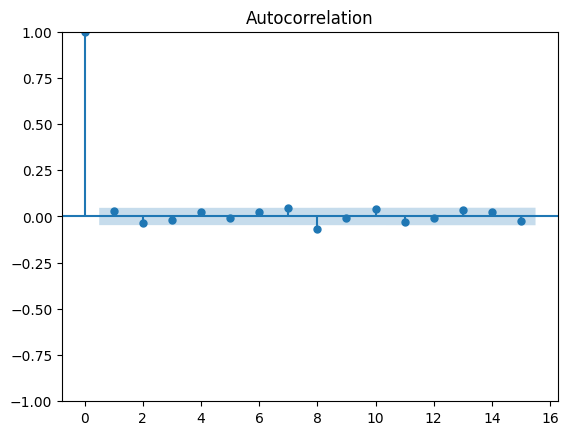

In [90]:
import statsmodels.graphics.tsaplots as tsa_plots
plt.figure(figsize=(25,7))
tsa_plots.plot_acf(data_log_diff_tr.dropna(),lags=15)
#tsa_plots.plot_pacf(data.Close,lags=20)
plt.show()

#### This is the ACF plot for the transformed data. As we can see the firsy line is crossing and coming out of the confidence interval. Thus only the lag of 1 days is relevant and hence the order is 1. That is, q=1

<Figure size 2500x700 with 0 Axes>

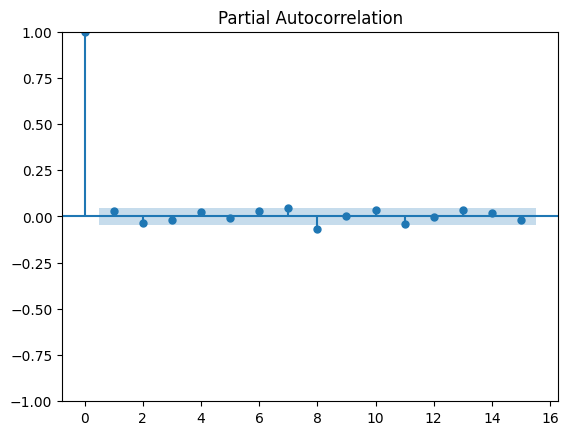

In [91]:
plt.figure(figsize=(25,7))
tsa_plots.plot_pacf(data_log_diff_tr.dropna(),lags=15)
plt.show()

#### This is the PACF plot for the transformed data. As we can see the first line is crossing and coming out of the confidence interval. Thus only till lag 1 we have to consider and hence the order is 1. That is, p=1

#### As we have done the differencing only once, d=1

# Model Building

In [92]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%Y')
# data = pd.read_csv('AAPL.csv', index_col='Date',parse_dates=['Date'], date_parser=dateparse)
data = pd.read_csv('AAPL.csv',parse_dates=['Date'], date_parser=dateparse)

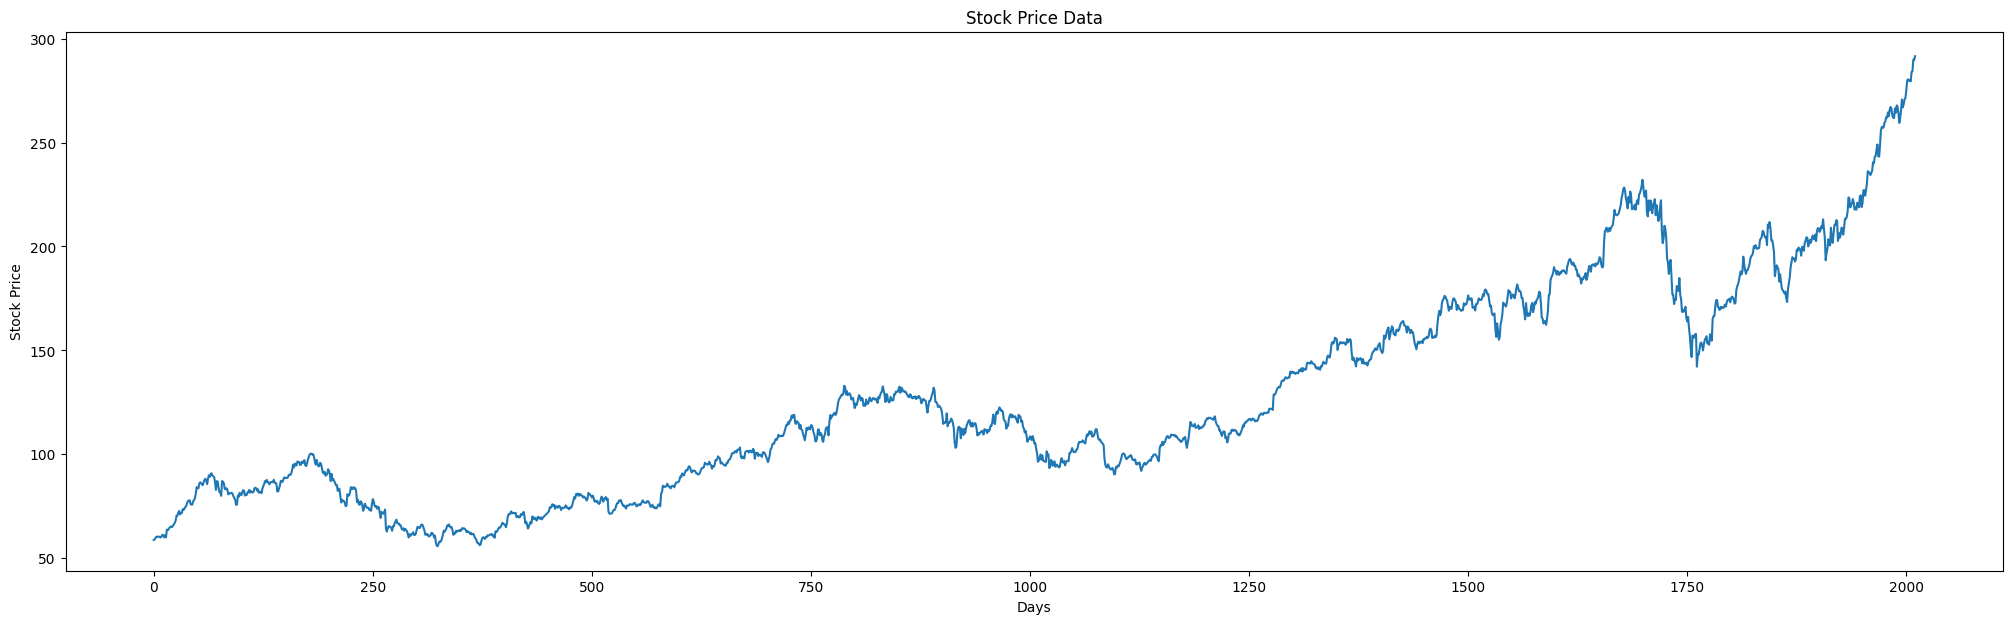

In [93]:
plt.figure(figsize=(25,7))
plt.plot(data["Close"])
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Stock Price Data')
plt.show()

# ARIMA Model
ARIMA is  short for AutoRegressive Integrated Moving Average, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.
ARIMA Models are specified by three order parameters: (p, d, q), where,

p is the order of the AR term

q is the order of the MA term

d is the number of differencing required to make the time series stationary

In [94]:
#stationary test
from statsmodels.tsa.stattools import adfuller
result = adfuller(data["Close"].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 1.219370
p-value: 0.996117


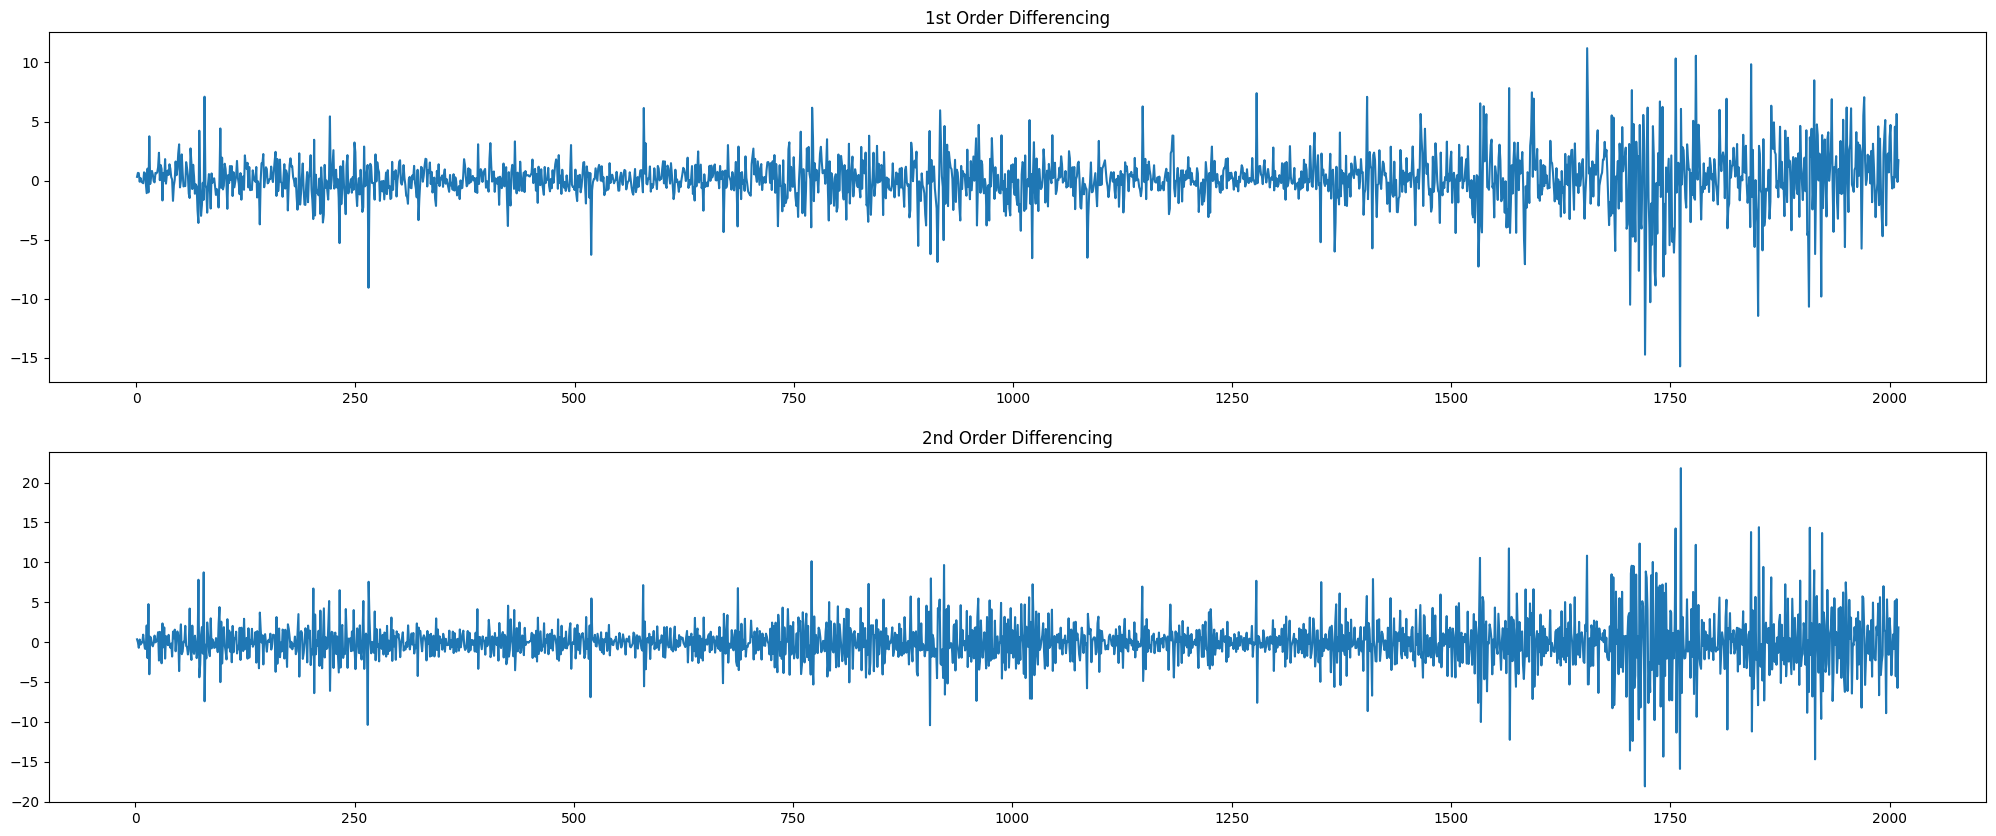

In [95]:
fig, axes = plt.subplots(2, 1, figsize=(25,10))
axes[0].plot(data["Close"].diff()); ax=axes[0].set_title('1st Order Differencing')
axes[1].plot(data["Close"].diff().diff()); ax=axes[1].set_title('2nd Order Differencing')
plt.show()

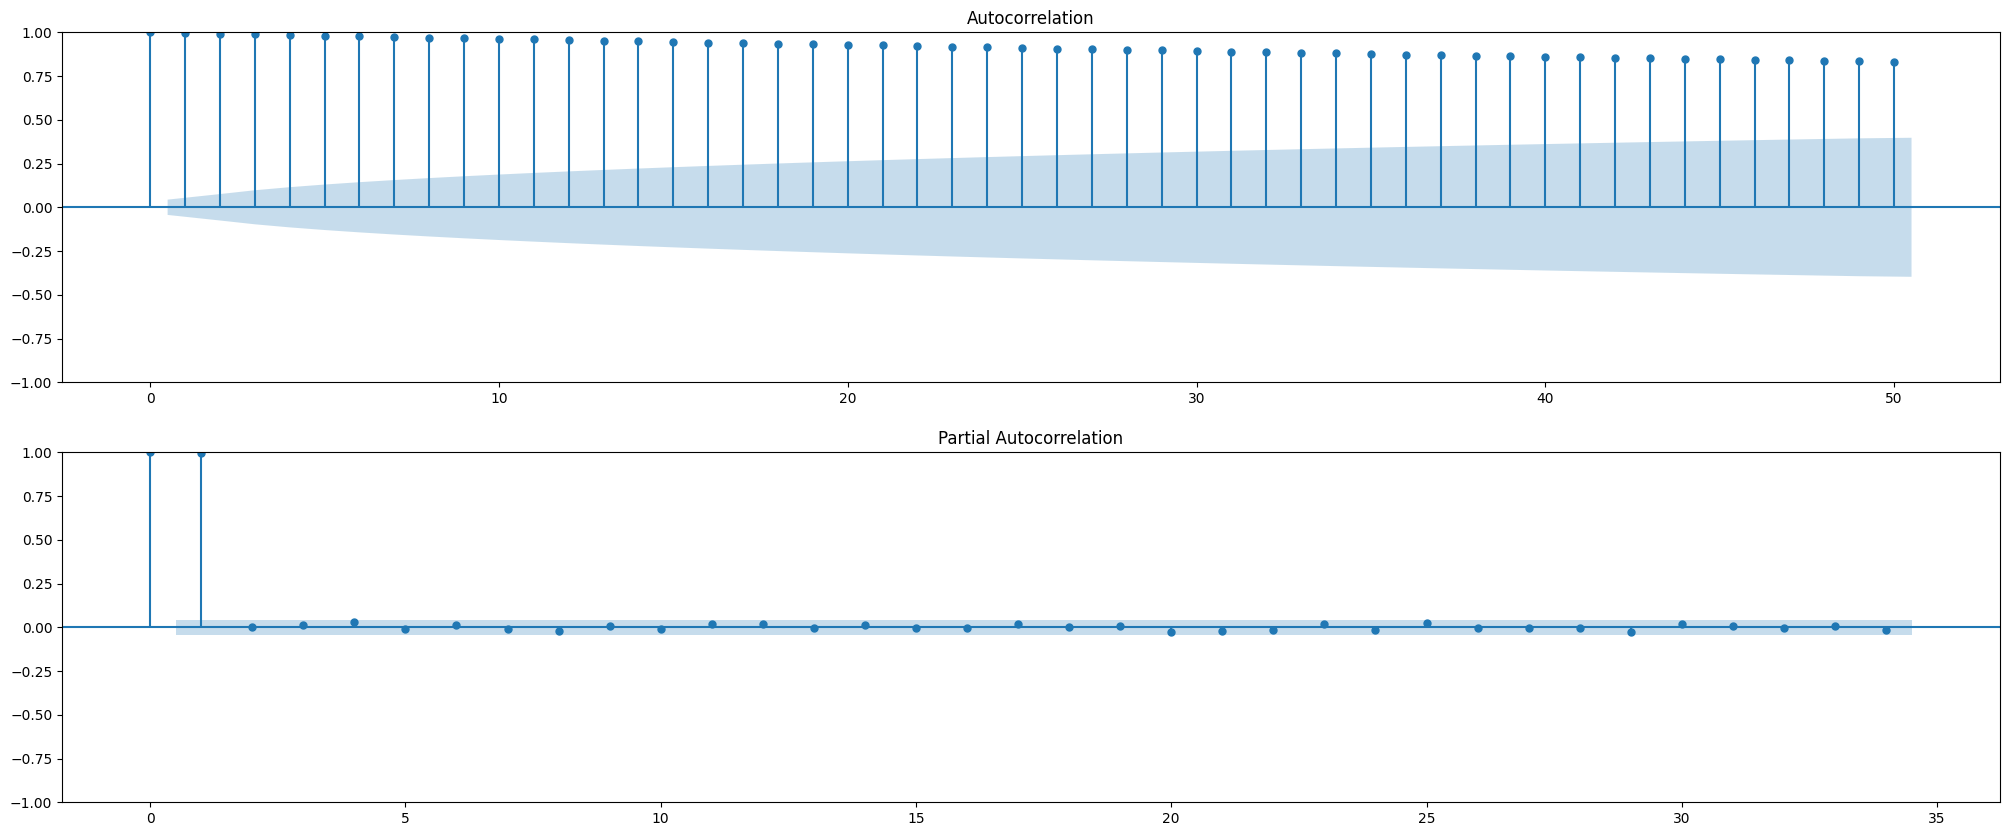

In [96]:
fig, axes = plt.subplots(2, 1, figsize=(25,10))
plot_acf(data["Close"], lags=50, ax=axes[0])
plot_pacf(data["Close"], ax=axes[1])
plt.show()

In [97]:
# Split the data into train and test sets
train_size = int(len(data["Close"]) * 0.9)
train_data, test_data = data["Close"][0:train_size], data["Close"][train_size:]

In [98]:
# Define the range of p, d, and q values to try
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

# Generate all possible combinations of p, d, and q values
pdq_values = list(itertools.product(p_values, d_values, q_values))

# Fit ARIMA models with each combination of p, d, and q values
best_aic = np.inf
best_pdq = None

for pdq in pdq_values:
    try:
        model = ARIMA(train_data, order=pdq)
        results = model.fit()
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_pdq = pdq
    except:
        continue

print('Best (p, d, q) values: {}'.format(best_pdq))

Best (p, d, q) values: (2, 1, 2)


In [99]:
# Fit the ARIMA model
model_arima = ARIMA(train_data, order=(2, 1, 2))
arima_fit = model_arima.fit()

In [100]:
# Predict the stock price for the test data
predictions_arima = arima_fit.forecast(steps=len(test_data))

In [101]:
# Calculate the mean squared error
mse = mean_squared_error(test_data, predictions_arima)
print("Mean Squared Error: ", mse)
# Calculate MAPE
mape = np.mean(np.abs((test_data - predictions_arima) / test_data)) * 100
print("MAPE:", mape)

Mean Squared Error:  2165.2271513625906
MAPE: 15.31457384836368


In [102]:
predictions_arima

1809    181.669627
1810    182.278087
1811    182.880239
1812    182.832769
1813    182.191449
           ...    
2006    182.196603
2007    182.511144
2008    182.572656
2009    182.317385
2010    182.020536
Name: predicted_mean, Length: 202, dtype: float64

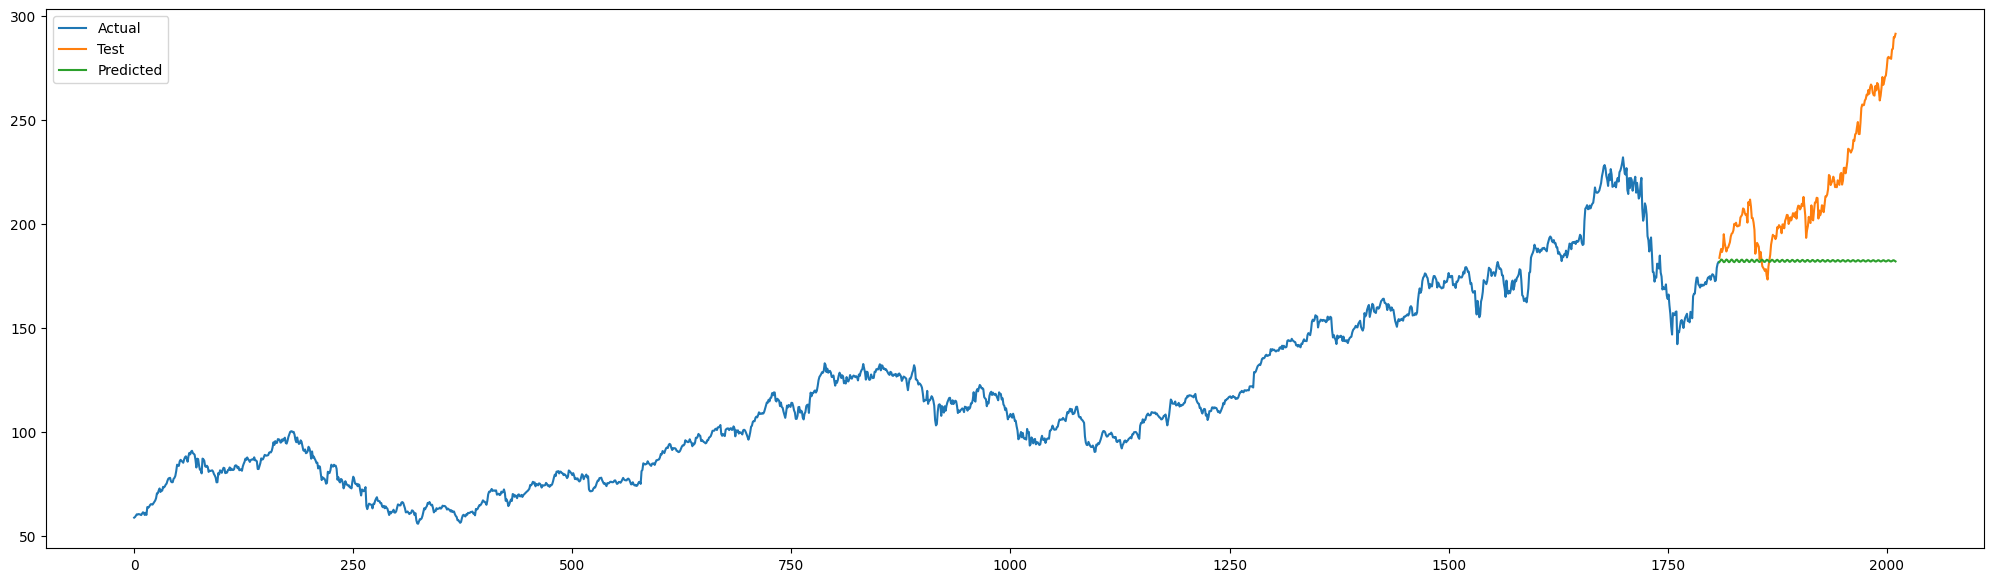

In [103]:
# Plot the actual vs predicted stock prices
plt.figure(figsize=(25,7))
plt.plot(train_data, label="Actual")
plt.plot(test_data, label="Test")
plt.plot(predictions_arima, label="Predicted")
plt.legend()
plt.show()

In [104]:
def evaluate_models(dataset, p_values, d_values, q_values, S_values):
    best_aic, best_mape, best_rmse, best_cfg = float("inf"), float("inf"), float("inf"), None

    for p in p_values:
        for d in d_values:
            for q in q_values:
                for S in S_values:
                    order = (p, d, q)
                    seasonal_order = (p, d, q, S)
                    try:
                        aic, mape, rmse = evaluate_sarima_model(dataset, order, seasonal_order)
                        if aic < best_aic and mape < best_mape and rmse < best_rmse:
                            best_aic, best_mape, best_rmse, best_cfg = aic, mape, rmse, order + seasonal_order
                        print('SARIMA{} RMSE={:.3f} AIC={:.3f} MAPE={:.3f}'.format(order + seasonal_order, rmse, aic, mape))
                    except:
                        continue

    print('Best SARIMA{} RMSE={:.3f} AIC={:.3f} MAPE={:.3f}'.format(best_cfg, best_rmse, best_aic, best_mape))

def evaluate_sarima_model(dataset, order, seasonal_order):
    train_size = int(len(dataset) * 0.8)
    train, test = dataset[:train_size], dataset[train_size:]
    model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()
    forecast = model_fit.forecast(len(test))
    rmse = np.sqrt(mean_squared_error(test, forecast))
    aic = model_fit.aic
    mape = mean_absolute_percentage_error(test, forecast)
    return aic, mape, rmse

# Define the parameter ranges
# Tried different p,d,q,s values and kept certrain values to run code faster
p_values = [0, 1]
d_values = range(1, 3)
q_values = range(0, 2)
S_values = [5,22]

evaluate_models(data["Close"].values, p_values, d_values, q_values, S_values)

SARIMA(0, 1, 0, 0, 1, 0, 5) RMSE=29.741 AIC=7284.972 MAPE=0.105
SARIMA(0, 1, 0, 0, 1, 0, 22) RMSE=227.114 AIC=7237.706 MAPE=0.973
SARIMA(0, 1, 1, 0, 1, 1, 5) RMSE=26.369 AIC=6184.335 MAPE=0.103
SARIMA(0, 1, 1, 0, 1, 1, 22) RMSE=26.373 AIC=6193.799 MAPE=0.103
SARIMA(0, 2, 0, 0, 2, 0, 5) RMSE=168741.246 AIC=10126.836 MAPE=502.209
SARIMA(0, 2, 0, 0, 2, 0, 22) RMSE=16099.366 AIC=9866.782 MAPE=47.568
SARIMA(0, 2, 1, 0, 2, 1, 5) RMSE=24.889 AIC=7313.004 MAPE=0.095
SARIMA(0, 2, 1, 0, 2, 1, 22) RMSE=344.463 AIC=7266.371 MAPE=1.394
SARIMA(1, 1, 0, 1, 1, 0, 5) RMSE=26.480 AIC=6783.973 MAPE=0.102
SARIMA(1, 1, 0, 1, 1, 0, 22) RMSE=120.606 AIC=6757.386 MAPE=0.520
SARIMA(1, 1, 1, 1, 1, 1, 5) RMSE=26.370 AIC=6187.404 MAPE=0.103
SARIMA(1, 1, 1, 1, 1, 1, 22) RMSE=26.403 AIC=6195.513 MAPE=0.102
SARIMA(1, 2, 0, 1, 2, 0, 5) RMSE=387703.680 AIC=8634.544 MAPE=1152.708
SARIMA(1, 2, 0, 1, 2, 0, 22) RMSE=40912.482 AIC=8580.825 MAPE=127.051
SARIMA(1, 2, 1, 1, 2, 1, 5) RMSE=25.113 AIC=6818.902 MAPE=0.109
SARIMA(

In [105]:
model_sarima = SARIMAX(train_data, order=(0,1,1), seasonal_order=(0,1,1,5))
sarima_fit = model_sarima.fit()

In [106]:
# predictions_sarima = sarima_fit.forecast(steps=30)
# Predict the stock price for the test data
predictions_sarima = sarima_fit.forecast(steps=len(test_data))

In [107]:
predictions_sarima

1809    181.709843
1810    181.807895
1811    181.949831
1812    181.901621
1813    182.061835
           ...    
2006    195.208245
2007    195.160035
2008    195.320248
2009    195.308216
2010    195.406268
Name: predicted_mean, Length: 202, dtype: float64

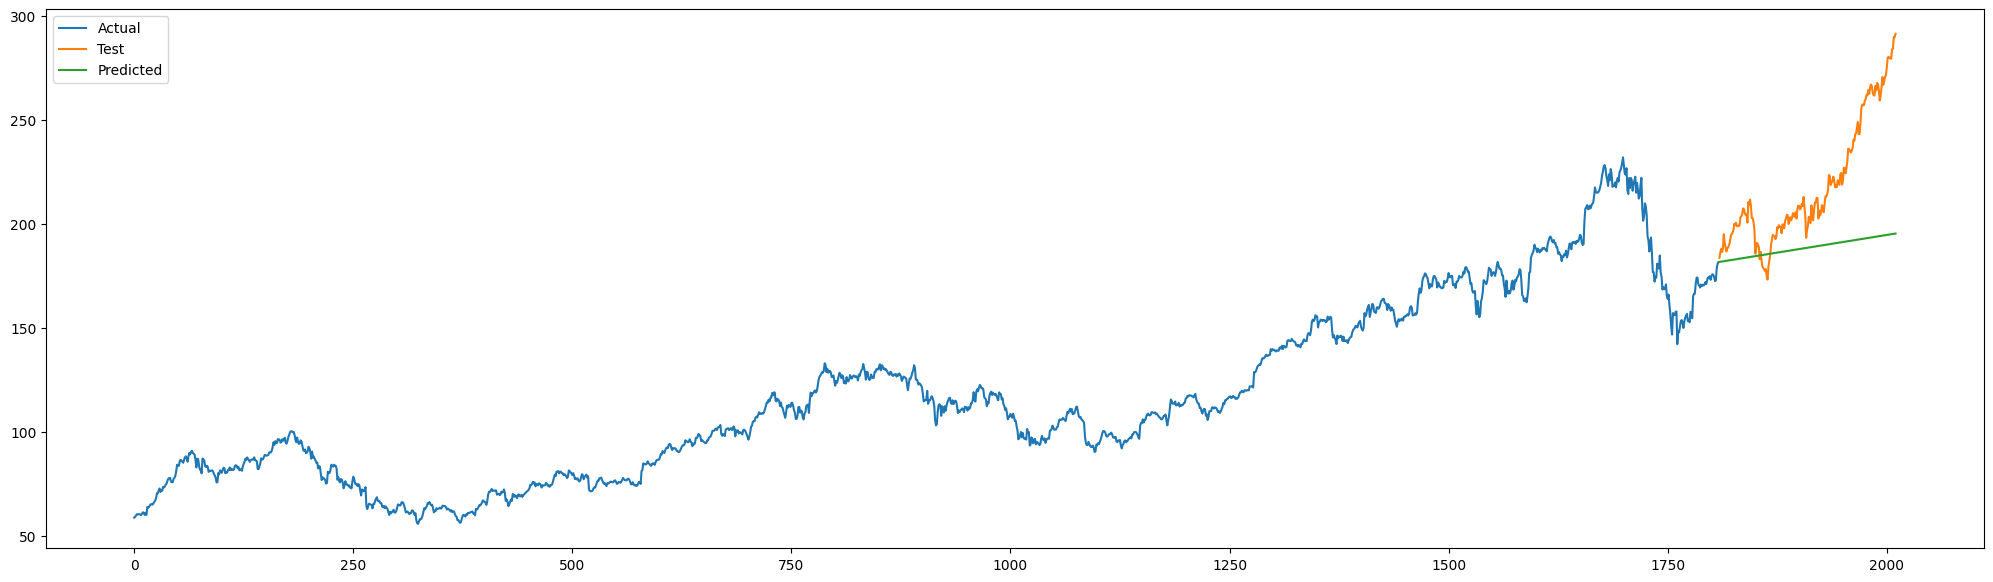

In [108]:
# Plot the actual vs predicted stock prices
plt.figure(figsize=(25,7))
plt.plot(train_data, label="Actual")
plt.plot(test_data, label="Test")
plt.plot(predictions_sarima, label="Predicted")
plt.legend()
plt.show()

In [109]:
final_sarima = SARIMAX(data["Close"], order=(0,1,1), seasonal_order=(0,1,1,5))
final_sarima_fit = final_sarima.fit()

In [110]:
final_pred_sarima = final_sarima_fit.forecast(steps=30)

In [111]:
final_pred_sarima

2011    291.750977
2012    291.758633
2013    291.891002
2014    291.989724
2015    292.120173
2016    292.330235
2017    292.337890
2018    292.470260
2019    292.568981
2020    292.699430
2021    292.909492
2022    292.917148
2023    293.049517
2024    293.148239
2025    293.278687
2026    293.488750
2027    293.496405
2028    293.628775
2029    293.727496
2030    293.857945
2031    294.068007
2032    294.075662
2033    294.208032
2034    294.306753
2035    294.437202
2036    294.647264
2037    294.654920
2038    294.787289
2039    294.886011
2040    295.016459
Name: predicted_mean, dtype: float64

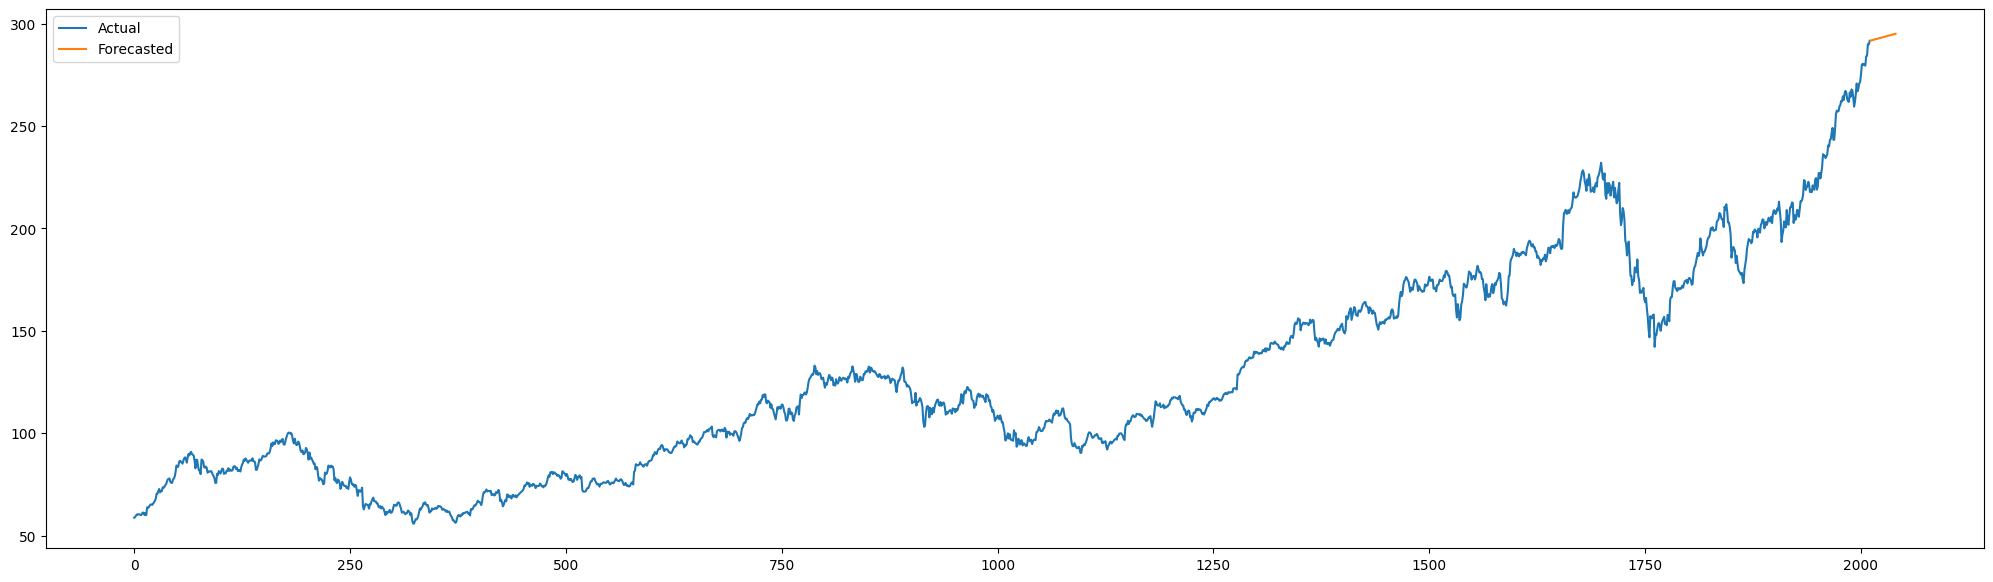

In [112]:
# Plot the actual vs predicted stock prices
plt.figure(figsize=(25,7))
plt.plot(data["Close"], label="Actual")
plt.plot(final_pred_sarima, label="Forecasted")
plt.legend()
plt.show()

In [113]:
import pickle

with open('sarima_model.pkl', 'wb') as f:
    pickle.dump(final_sarima_fit, f)